In [38]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

### Houston

In [44]:
houston = pd.read_csv('Houston.csv')
houston.head(2)

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude
0,162,Houston Deer Park C3,Houston-Sugar Land-Baytown,US,2021-10-06T11:00:00+00:00,2021-10-06T06:00:00-05:00,o3,0.001,ppm,29.670025,-95.128508
1,162,Houston Deer Park C3,Houston-Sugar Land-Baytown,US,2021-10-06T10:00:00+00:00,2021-10-06T05:00:00-05:00,o3,0.003,ppm,29.670025,-95.128508


In [45]:
houston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56854 entries, 0 to 56853
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   locationId  56854 non-null  int64  
 1   location    56854 non-null  object 
 2   city        56854 non-null  object 
 3   country     56854 non-null  object 
 4   utc         56854 non-null  object 
 5   local       56854 non-null  object 
 6   parameter   56854 non-null  object 
 7   value       56854 non-null  float64
 8   unit        56854 non-null  object 
 9   latitude    56854 non-null  float64
 10  longitude   56854 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.8+ MB


In [46]:
houston.shape

(56854, 11)

In [47]:
houston['parameter'].value_counts()

o3      33762
pm25    23092
Name: parameter, dtype: int64

In [48]:
houston['unit'].value_counts()

ppm      33762
µg/m³    23092
Name: unit, dtype: int64

In [49]:
houston = houston.loc[(houston['parameter'] == 'pm25') & (houston['unit'] == 'µg/m³')]

In [50]:
houston['utc'] = pd.to_datetime(houston['utc'])

In [51]:
houston = houston.sort_values('utc')
houston.head(2)

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude
56853,162,Houston Deer Park C3,Houston-Sugar Land-Baytown,US,2016-06-15 04:00:00+00:00,2016-06-14T23:00:00-05:00,pm25,15.7,µg/m³,29.670025,-95.128508
56850,162,Houston Deer Park C3,Houston-Sugar Land-Baytown,US,2016-06-15 05:00:00+00:00,2016-06-15T00:00:00-05:00,pm25,15.1,µg/m³,29.670025,-95.128508


In [52]:
houston['year'] = houston['utc'].dt.year

In [53]:
houston.head(2)

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude,year
56853,162,Houston Deer Park C3,Houston-Sugar Land-Baytown,US,2016-06-15 04:00:00+00:00,2016-06-14T23:00:00-05:00,pm25,15.7,µg/m³,29.670025,-95.128508,2016
56850,162,Houston Deer Park C3,Houston-Sugar Land-Baytown,US,2016-06-15 05:00:00+00:00,2016-06-15T00:00:00-05:00,pm25,15.1,µg/m³,29.670025,-95.128508,2016


In [54]:
houston['year'].value_counts()

2019    7700
2018    5561
2017    5316
2016    4515
Name: year, dtype: int64

In [55]:
houston.head(2)

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude,year
56853,162,Houston Deer Park C3,Houston-Sugar Land-Baytown,US,2016-06-15 04:00:00+00:00,2016-06-14T23:00:00-05:00,pm25,15.7,µg/m³,29.670025,-95.128508,2016
56850,162,Houston Deer Park C3,Houston-Sugar Land-Baytown,US,2016-06-15 05:00:00+00:00,2016-06-15T00:00:00-05:00,pm25,15.1,µg/m³,29.670025,-95.128508,2016


In [60]:
houston_pm25 = houston.groupby(['year', 'city', 'parameter'], as_index=False).agg({'value':'mean'})
houston_pm25

,year,city,parameter,value
0,2016,Houston-Sugar Land-Baytown,pm25,8.191340
1,2017,Houston-Sugar Land-Baytown,pm25,7.745053
2,2018,Houston-Sugar Land-Baytown,pm25,8.357957
3,2019,Houston-Sugar Land-Baytown,pm25,7.292325


<AxesSubplot:xlabel='year', ylabel='value'>

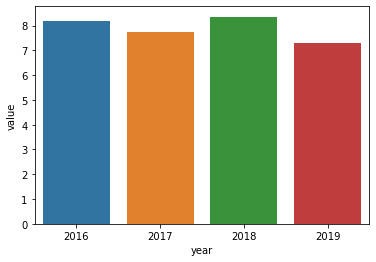

In [61]:
sns.barplot(data=houston_pm25, x='year', y='value')

Houston se mantiene por debajo en los valores de contaminación establecidos por la OMS para pm2.5 anualmente.

### Santiago

In [73]:
santiago = pd.read_csv('Santiago.csv')

In [74]:
santiago.head(2)

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude
0,25,Parque O'Higgins,Santiago,CL,2021-08-20T21:00:00+00:00,2021-08-20T20:00:00-01:00,pm25,30,µg/m³,-33.464142,-70.660797
1,25,Parque O'Higgins,Santiago,CL,2021-08-20T21:00:00+00:00,2021-08-20T20:00:00-01:00,pm10,100,µg/m³,-33.464142,-70.660797


In [75]:
santiago.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20866 entries, 0 to 20865
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   locationId  20866 non-null  int64  
 1   location    20866 non-null  object 
 2   city        20866 non-null  object 
 3   country     20866 non-null  object 
 4   utc         20866 non-null  object 
 5   local       20866 non-null  object 
 6   parameter   20866 non-null  object 
 7   value       20866 non-null  int64  
 8   unit        20866 non-null  object 
 9   latitude    20866 non-null  float64
 10  longitude   20866 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 1.8+ MB


In [76]:
santiago.shape

(20866, 11)

In [77]:
santiago['parameter'].value_counts()

pm25    10434
pm10    10432
Name: parameter, dtype: int64

In [78]:
santiago['unit'].value_counts()

µg/m³    20866
Name: unit, dtype: int64

In [79]:
santiago = santiago.loc[santiago['parameter'] == 'pm25']

In [80]:
santiago['utc'] = pd.to_datetime(santiago['utc'])

In [83]:
santiago = santiago.sort_values('utc')
santiago.head(2)

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude
20865,25,Parque O'Higgins,Santiago,CL,2020-01-01 04:00:00+00:00,2020-01-01T03:00:00-01:00,pm25,10,µg/m³,-33.464142,-70.660797
20862,25,Parque O'Higgins,Santiago,CL,2020-01-01 05:00:00+00:00,2020-01-01T04:00:00-01:00,pm25,24,µg/m³,-33.464142,-70.660797


In [84]:
santiago['year'] = santiago['utc'].dt.year

In [86]:
santiago.head(2)

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude,year
20865,25,Parque O'Higgins,Santiago,CL,2020-01-01 04:00:00+00:00,2020-01-01T03:00:00-01:00,pm25,10,µg/m³,-33.464142,-70.660797,2020
20862,25,Parque O'Higgins,Santiago,CL,2020-01-01 05:00:00+00:00,2020-01-01T04:00:00-01:00,pm25,24,µg/m³,-33.464142,-70.660797,2020


In [87]:
santiago['year'].value_counts()

2020    7546
2021    2888
Name: year, dtype: int64

In [89]:
santiago_pm25 = santiago.groupby(['year', 'city', 'parameter'], as_index=False).agg({'value':'mean'})
santiago_pm25

,year,city,parameter,value
0,2020,Santiago,pm25,20.293798
1,2021,Santiago,pm25,21.945637


<AxesSubplot:xlabel='year', ylabel='value'>

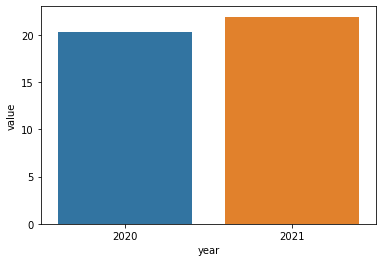

In [93]:
sns.barplot(data=santiago_pm25, x='year', y='value')

### Mexico

In [104]:
mexico = pd.read_csv('df_new_cam.csv')

In [105]:
mexico.head(2)

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude
0,1739,Camarones,DISTRITO FEDERAL,MX,2021-10-06T14:00:00+00:00,2021-10-06T09:00:00-05:00,pm25,5,µg/m³,19.4684,-99.1697
1,1739,Camarones,DISTRITO FEDERAL,MX,2021-10-06T14:00:00+00:00,2021-10-06T09:00:00-05:00,pm10,17,µg/m³,19.4684,-99.1697


In [106]:
mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14105 entries, 0 to 14104
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   locationId  14105 non-null  int64  
 1   location    14105 non-null  object 
 2   city        14105 non-null  object 
 3   country     14105 non-null  object 
 4   utc         14105 non-null  object 
 5   local       14105 non-null  object 
 6   parameter   14105 non-null  object 
 7   value       14105 non-null  int64  
 8   unit        14105 non-null  object 
 9   latitude    14105 non-null  float64
 10  longitude   14105 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 1.2+ MB


In [107]:
mexico.shape

(14105, 11)

In [108]:
mexico['parameter'].value_counts()

pm10    7086
pm25    7019
Name: parameter, dtype: int64

In [109]:
mexico['unit'].value_counts()

µg/m³    14105
Name: unit, dtype: int64

In [110]:
mexico = mexico.loc[mexico['parameter'] == 'pm25']

In [111]:
mexico['utc'] = pd.to_datetime(mexico['utc'])

In [112]:
mexico = mexico.sort_values('utc')
mexico.head(2)

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude
14104,1739,Camarones,DISTRITO FEDERAL,MX,2019-04-09 20:00:00+00:00,2019-04-09T15:00:00-05:00,pm25,17,µg/m³,19.4684,-99.1697
14102,1739,Camarones,DISTRITO FEDERAL,MX,2019-04-09 21:00:00+00:00,2019-04-09T16:00:00-05:00,pm25,14,µg/m³,19.4684,-99.1697


In [113]:
mexico['year'] = mexico['utc'].dt.year

In [114]:
mexico.head(2)

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude,year
14104,1739,Camarones,DISTRITO FEDERAL,MX,2019-04-09 20:00:00+00:00,2019-04-09T15:00:00-05:00,pm25,17,µg/m³,19.4684,-99.1697,2019
14102,1739,Camarones,DISTRITO FEDERAL,MX,2019-04-09 21:00:00+00:00,2019-04-09T16:00:00-05:00,pm25,14,µg/m³,19.4684,-99.1697,2019


In [115]:
mexico['year'].value_counts()

2020    3349
2021    2359
2019    1311
Name: year, dtype: int64

In [116]:
mexico_pm25 = mexico.groupby(['year', 'city', 'parameter'], as_index=False).agg({'value':'mean'})
mexico_pm25

,year,city,parameter,value
0,2019,DISTRITO FEDERAL,pm25,26.372235
1,2020,DISTRITO FEDERAL,pm25,18.066886
2,2021,DISTRITO FEDERAL,pm25,19.555320


<AxesSubplot:xlabel='year', ylabel='value'>

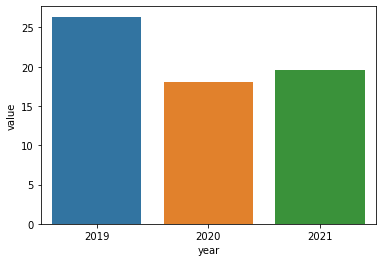

In [118]:
sns.barplot(data=mexico_pm25, x='year', y='value')

### Dehli

In [128]:
dehli = pd.read_csv('Dehli.csv')

In [129]:
dehli.head(2)

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude
0,5570,"Aya Nagar, Delhi - IMD",Delhi,IN,2020-12-31T04:00:00+00:00,2020-12-31T09:30:00+05:30,pm10,179.59,µg/m³,28.470691,77.109936
1,5570,"Aya Nagar, Delhi - IMD",Delhi,IN,2020-12-31T04:00:00+00:00,2020-12-31T09:30:00+05:30,pm25,115.80,µg/m³,28.470691,77.109936


In [130]:
dehli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30500 entries, 0 to 30499
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   locationId  30500 non-null  int64  
 1   location    30500 non-null  object 
 2   city        30500 non-null  object 
 3   country     30500 non-null  object 
 4   utc         30500 non-null  object 
 5   local       30500 non-null  object 
 6   parameter   30500 non-null  object 
 7   value       30500 non-null  float64
 8   unit        30500 non-null  object 
 9   latitude    30500 non-null  float64
 10  longitude   30500 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 2.6+ MB


In [131]:
dehli.shape

(30500, 11)

In [132]:
dehli['parameter'].value_counts()

pm25    15250
pm10    15250
Name: parameter, dtype: int64

In [133]:
dehli['unit'].value_counts()

µg/m³    30500
Name: unit, dtype: int64

In [134]:
dehli = dehli.loc[dehli['parameter'] == 'pm25']

In [135]:
dehli['utc'] = pd.to_datetime(dehli['utc'])

In [136]:
dehli = dehli.sort_values('utc')
dehli.head(2)

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude
30498,5570,"Aya Nagar, Delhi - IMD",Delhi,IN,2020-01-01 04:00:00+00:00,2020-01-01T09:30:00+05:30,pm25,446.75,µg/m³,28.470691,77.109936
30496,5570,"Aya Nagar, Delhi - IMD",Delhi,IN,2020-01-01 04:15:00+00:00,2020-01-01T09:45:00+05:30,pm25,400.46,µg/m³,28.470691,77.109936


In [137]:
dehli['year'] = dehli['utc'].dt.year

In [138]:
dehli.head(2)

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude,year
30498,5570,"Aya Nagar, Delhi - IMD",Delhi,IN,2020-01-01 04:00:00+00:00,2020-01-01T09:30:00+05:30,pm25,446.75,µg/m³,28.470691,77.109936,2020
30496,5570,"Aya Nagar, Delhi - IMD",Delhi,IN,2020-01-01 04:15:00+00:00,2020-01-01T09:45:00+05:30,pm25,400.46,µg/m³,28.470691,77.109936,2020


In [139]:
dehli['year'].value_counts()

2020    15250
Name: year, dtype: int64

In [140]:
dehli_pm25 = dehli.groupby(['year', 'city', 'parameter'], as_index=False).agg({'value':'mean'})
dehli_pm25

,year,city,parameter,value
0,2020,Delhi,pm25,69.113219


Hacer un filtrado por year=2020

In [146]:
mexico_y = mexico_pm25[mexico_pm25['year'] == 2020]

In [148]:
santiago_y = santiago_pm25[santiago_pm25['year'] == 2020]

In [150]:
pm_25_by_country = pd.concat([dehli_pm25, mexico_y, santiago_y], axis=0)

In [151]:
pm_25_by_country

,year,city,parameter,value
0,2020,Delhi,pm25,69.113219
1,2020,DISTRITO FEDERAL,pm25,18.066886
0,2020,Santiago,pm25,20.293798


<AxesSubplot:xlabel='city', ylabel='value'>

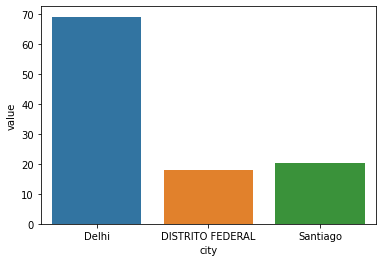

In [153]:
sns.barplot(data=pm_25_by_country, x='city', y='value')